# Data Exploration for Autonomous Machines driving data

In [2]:
"""
@author: amirjaved
"""
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
import preprocessor
import random

In [3]:
RAW_DATA_DIR = 'data/'
PROCESSED_DATA_DIR = 'data_processed/'
# The size of the figures in this notebook
FIGURE_SIZE = (10,10)

## First look at data 

In [4]:
## looking head for data.csv
sample_csv_path = os.path.join(RAW_DATA_DIR, 'data.csv')
sample_csv = pd.read_csv(sample_csv_path, sep=',')
sample_csv = sample_csv.rename(columns=({'Unnamed: 0':'image_path','dist_0':'distance','ABS_RX':'steering_angle','ABS_Y':'speed'}))
#sample_csv.columns['image_path','distance','steering_angle','speed']
sample_csv.head()

,image_path,distance,steering_angle,speed
0,2020-06-16_08-53-24-362221,242.32,0.0,0.0
1,2020-06-16_08-53-25-504531,241.55,0.0,0.2
2,2020-06-16_08-53-26-657194,183.66,0.0,0.5
3,2020-06-16_08-53-27-807611,121.49,0.0,0.5
4,2020-06-16_08-53-28-958042,112.80,-1.0,0.5


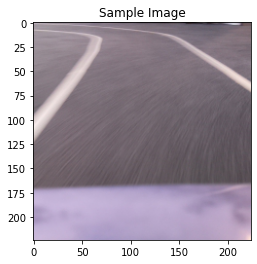

In [5]:
## looking sample image
sample_image_path = os.path.join(RAW_DATA_DIR, '2020-06-23_14-05-46-655974.jpg')
sample_image = Image.open(sample_image_path)
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()

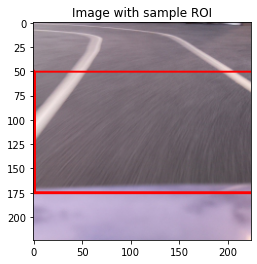

In [6]:
## focusing on ROI(region of interest)// might be helpful for memory issues
sample_image_roi = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(sample_image_roi)
points = [(1,50), (1,175), (255,175), (255,51)]
for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=3)
del draw

plt.title('Image with sample ROI')
plt.imshow(sample_image_roi)
plt.show()

In [7]:
#No of Data points
print('Number of data points: {0}'.format(sample_csv.shape[0]))

Number of data points: 2656


## Visualizing Target Variable(Steering Angle)

### Scatter Plot

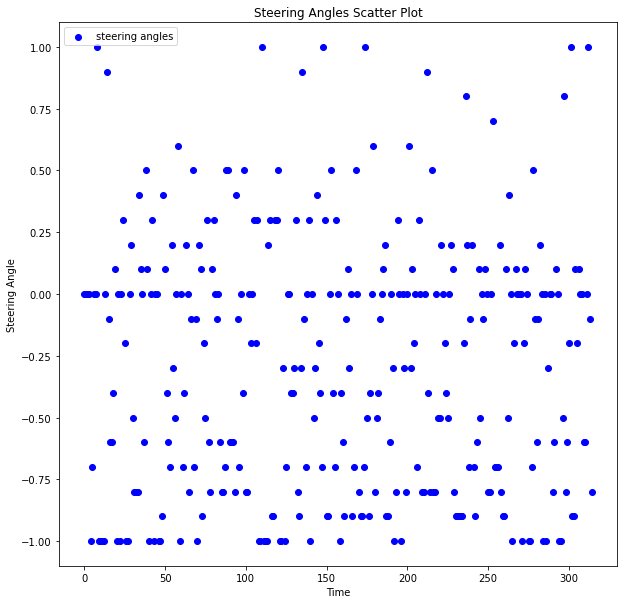

In [8]:
# Scatter Plot for steering Angle
min_index = 0
max_index = 315
steering_angles_info = sample_csv['steering_angle'][min_index:max_index]

plot_index = [i for i in range(min_index, max_index, 1)]

fig = plt.figure(figsize=FIGURE_SIZE)
ax1 = fig.add_subplot(111)
ax1.scatter(plot_index, steering_angles_info, c='b', marker='o', label='steering angles')
plt.legend(loc='upper left');
plt.title('Steering Angles Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

### Histogram 

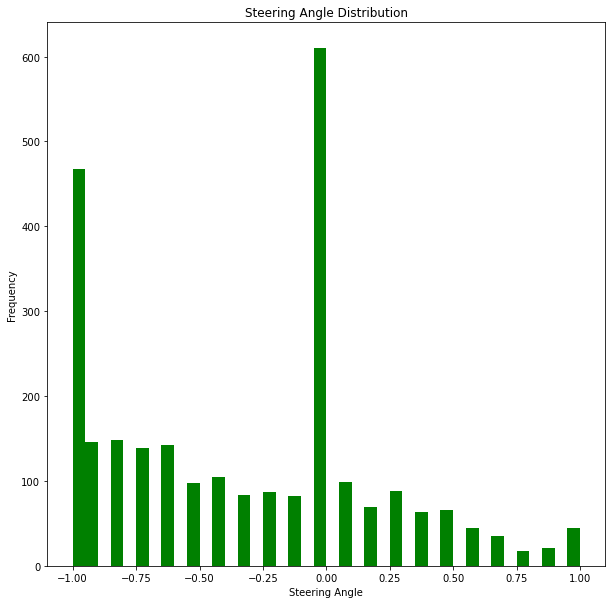

In [10]:
bins = np.arange(-1, 1.05, 0.05)
labels = sample_csv['steering_angle']

def steering_histogram(hist_labels, title, color):
    plt.figure(figsize=FIGURE_SIZE)
    n, b, p = plt.hist(hist_labels, bins, facecolor=color)
    plt.xlabel('Steering Angle')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

steering_histogram(labels, 'Steering Angle Distribution', 'g')

## Way Forward to Training

At this point, we need to combine the raw data into compressed data files suitable for training. Here, we will use .h5 files, as this format is ideal for supporting large datasets without reading everything into memory all at once. It also works seamlessly with Keras.

We will also combine all the datasets into one and then split it into train/test/validation datasets.